# Imports

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional for clean visuals
sns.set(style="whitegrid")

# Visual EDA

In [14]:
cost = pd.read_csv('data/healthcare-expenditure.csv')
gdp = pd.read_csv('data/gdp.csv')
mortality = pd.read_csv('./data/child-mortality.csv')
merged = gdp.merge(cost, on=["Entity", "Code", "Year"], suffixes=('_gdp', '_cost'))
merged = merged.merge(mortality, on=["Entity", "Code", "Year"])

In [16]:
clean_df = merged[[
    "Entity", "Code", "Year",
    "GDP per capita, PPP (constant 2021 international $)_gdp",
    "Current health expenditure per capita, PPP (current international $)",
    "Child mortality rate of children aged under five years, per 100 live births"
]].rename(columns={
    "GDP per capita, PPP (constant 2021 international $)_gdp": "GDP_per_capita",
    "Current health expenditure per capita, PPP (current international $)": "Health_Expenditure_per_capita",
    "Child mortality rate of children aged under five years, per 100 live births": "Child_Mortality"
})
clean_df = clean_df.dropna(subset=["GDP_per_capita", "Health_Expenditure_per_capita", "Child_Mortality"])


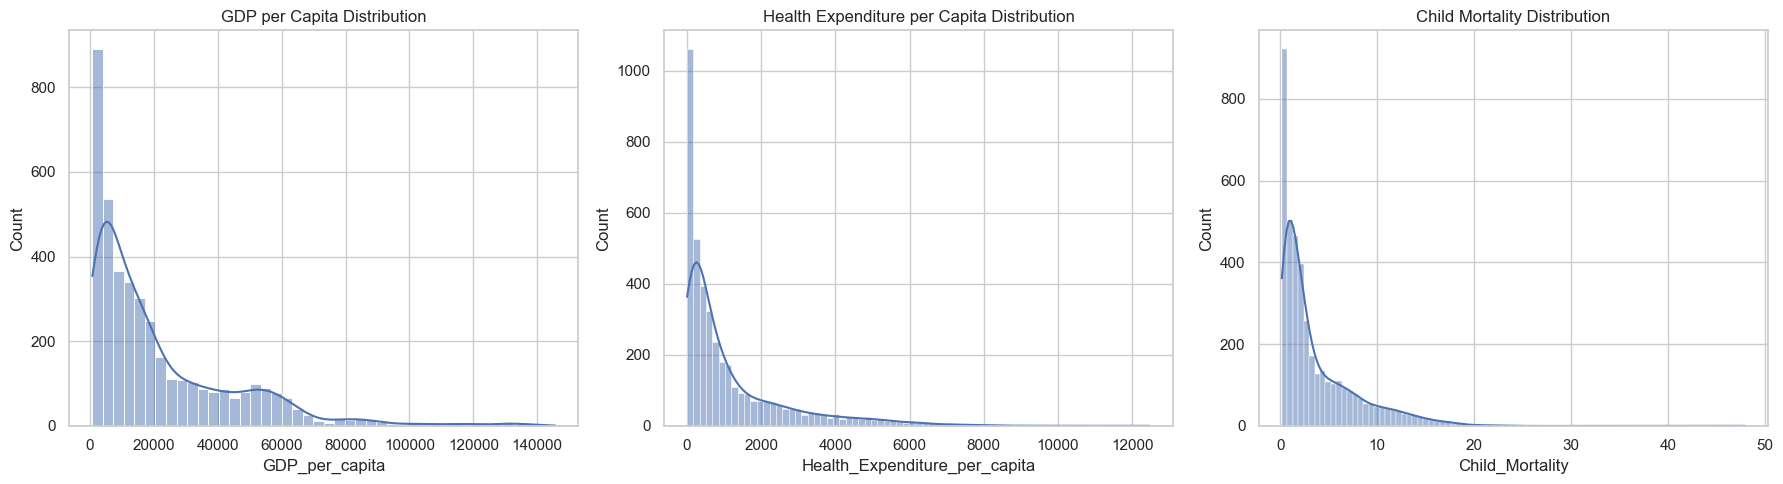

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(clean_df["GDP_per_capita"], kde=True, ax=axs[0])
axs[0].set_title("GDP per Capita Distribution")

sns.histplot(clean_df["Health_Expenditure_per_capita"], kde=True, ax=axs[1])
axs[1].set_title("Health Expenditure per Capita Distribution")

sns.histplot(clean_df["Child_Mortality"], kde=True, ax=axs[2])
axs[2].set_title("Child Mortality Distribution")

plt.tight_layout()
plt.show()

## Correlations

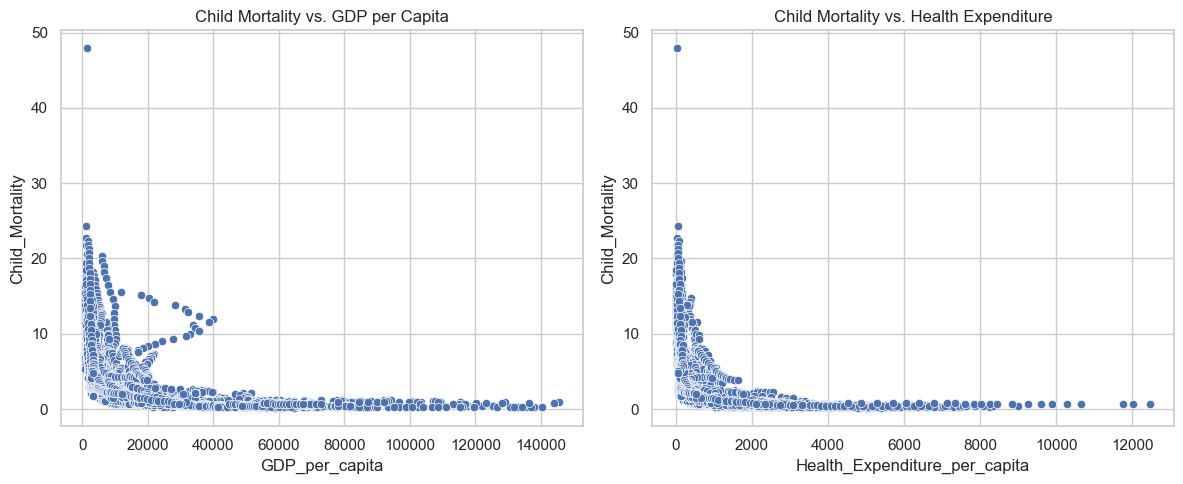

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=clean_df, x="GDP_per_capita", y="Child_Mortality", ax=axs[0])
axs[0].set_title("Child Mortality vs. GDP per Capita")

sns.scatterplot(data=clean_df, x="Health_Expenditure_per_capita", y="Child_Mortality", ax=axs[1])
axs[1].set_title("Child Mortality vs. Health Expenditure")

plt.tight_layout()
plt.show()

## Global Trends

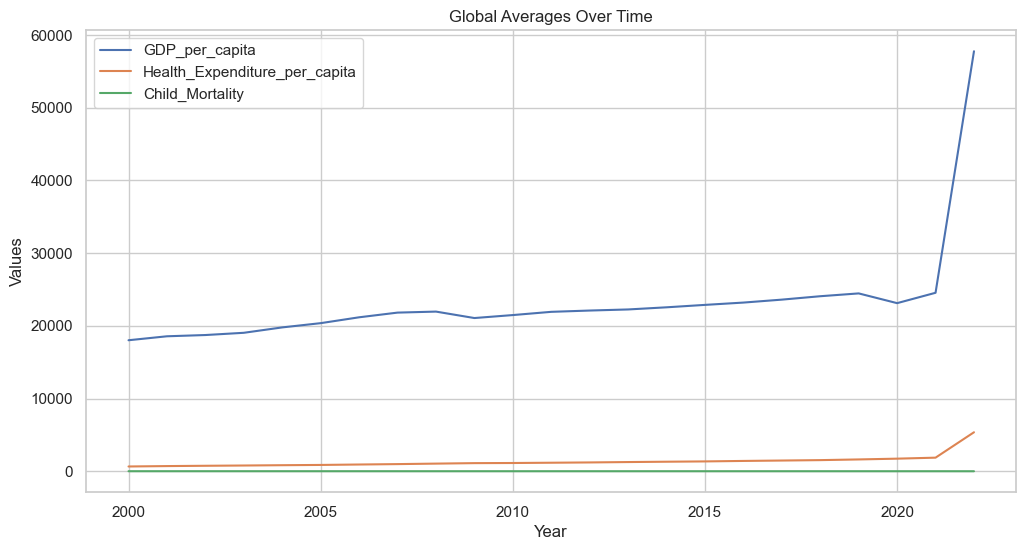

In [20]:
global_avg = clean_df.groupby("Year")[["GDP_per_capita", "Health_Expenditure_per_capita", "Child_Mortality"]].mean()

fig, ax = plt.subplots(figsize=(12, 6))
global_avg.plot(ax=ax)
ax.set_title("Global Averages Over Time")
ax.set_ylabel("Values")
plt.show()

# Prediction Linear Regression

In [21]:
X = clean_df[["GDP_per_capita", "Health_Expenditure_per_capita"]]
y = clean_df["Child_Mortality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coeffs = dict(zip(X.columns, model.coef_))
intercept = model.intercept_

print("MSE:", mse)
print("R²:", r2)
print("Coefficients:", coeffs)
print("Intercept:", intercept)

MSE: 11.235047336392583
R²: 0.30953067101460774
Coefficients: {'GDP_per_capita': -6.36352860258328e-05, 'Health_Expenditure_per_capita': -0.0005073929194521407}
Intercept: 5.704722255546882


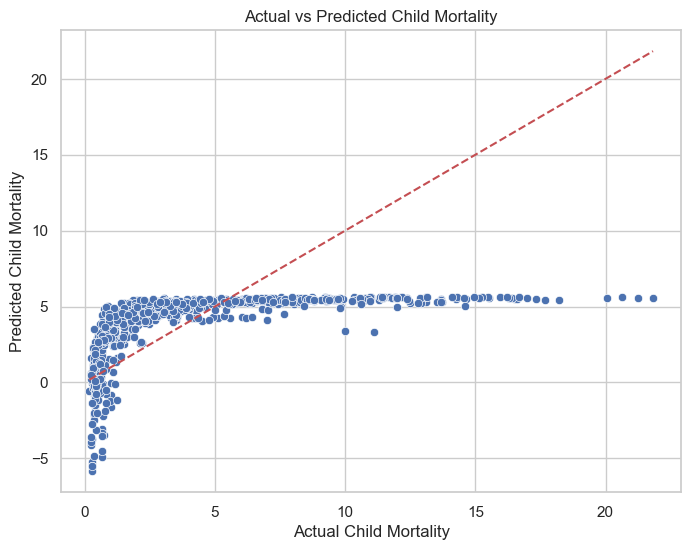

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Child Mortality")
plt.ylabel("Predicted Child Mortality")
plt.title("Actual vs Predicted Child Mortality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree reference
plt.show()

<Axes: >

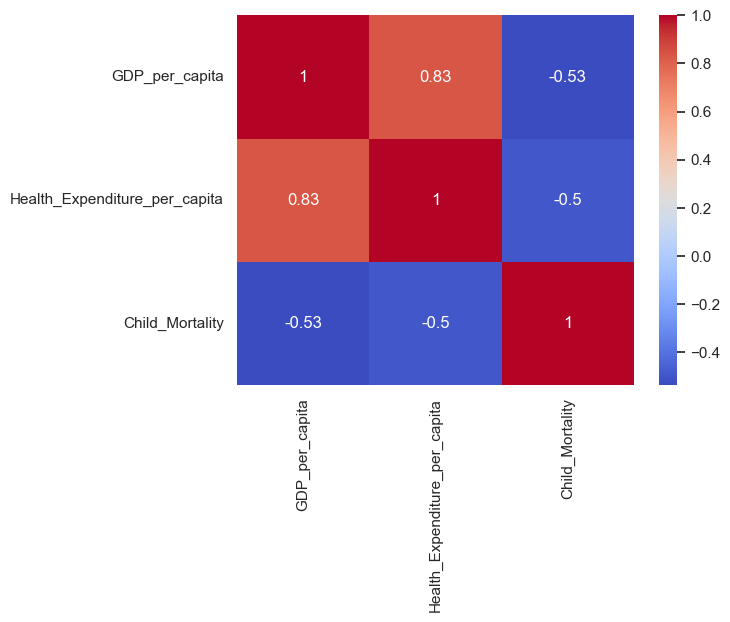

In [24]:
sns.heatmap(clean_df[["GDP_per_capita", "Health_Expenditure_per_capita", "Child_Mortality"]].corr(), annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'Top 10 Countries needing most urgent health intervention')

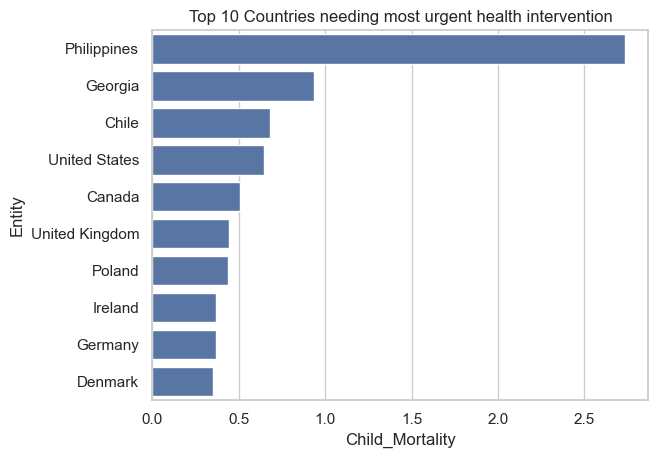

In [26]:
latest_year = clean_df["Year"].max()
latest_data = clean_df[clean_df["Year"] == latest_year]

top_mortality = latest_data.sort_values(by="Child_Mortality", ascending=False).head(10)
sns.barplot(data=top_mortality, x="Child_Mortality", y="Entity")
plt.title("Top 10 Countries needing most urgent health intervention")

Text(0.5, 1.0, 'Child Mortality Over Time')

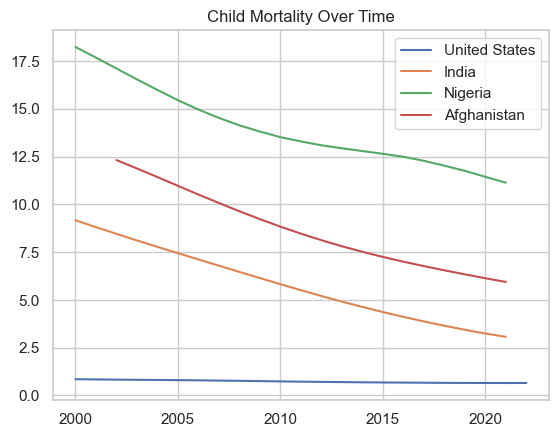

In [32]:
for country in ["United States", "India", "Nigeria", "Afghanistan"]:
    subset = clean_df[clean_df["Entity"] == country]
    plt.plot(subset["Year"], subset["Child_Mortality"], label=country)

plt.legend()
plt.title("Child Mortality Over Time")


Text(0.5, 1.0, 'GDP vs. Health Expenditure (bubble = child mortality)')

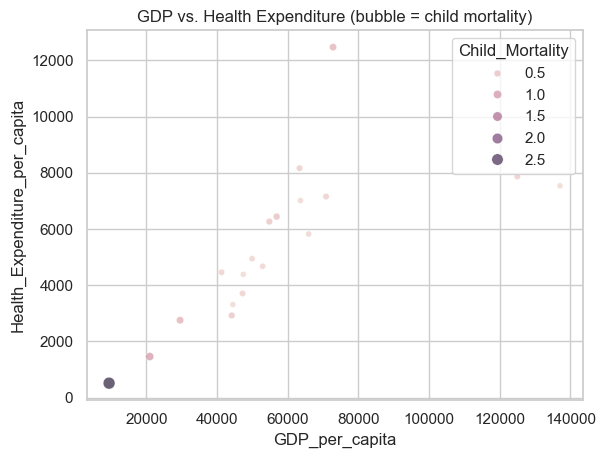

In [28]:
sns.scatterplot(data=latest_data, x="GDP_per_capita", y="Health_Expenditure_per_capita", size="Child_Mortality", hue="Child_Mortality", alpha=0.7)
plt.title("GDP vs. Health Expenditure (bubble = child mortality)")


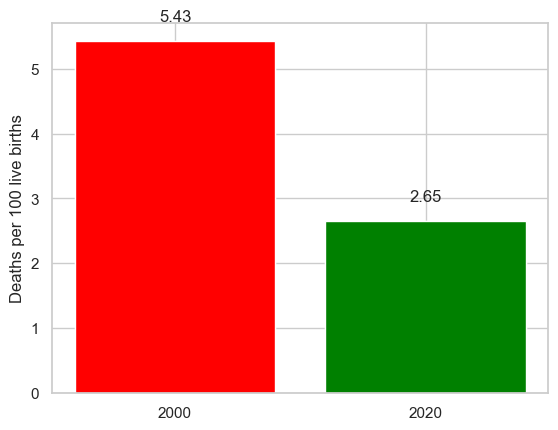

In [36]:
early = clean_df[clean_df["Year"] == 2000]
recent = clean_df[clean_df["Year"] == 2020]

early_avg = early["Child_Mortality"].mean()
recent_avg = recent["Child_Mortality"].mean()

plt.bar(["2000", "2020"], [early_avg, recent_avg])
plt.bar(["2000", "2020"], [early_avg, recent_avg], color=["red", "green"])
plt.ylabel("Deaths per 100 live births")
for i, val in enumerate([early_avg, recent_avg]):
    plt.text(i, val + 0.3, f"{val:.2f}", ha='center')
plt.show()


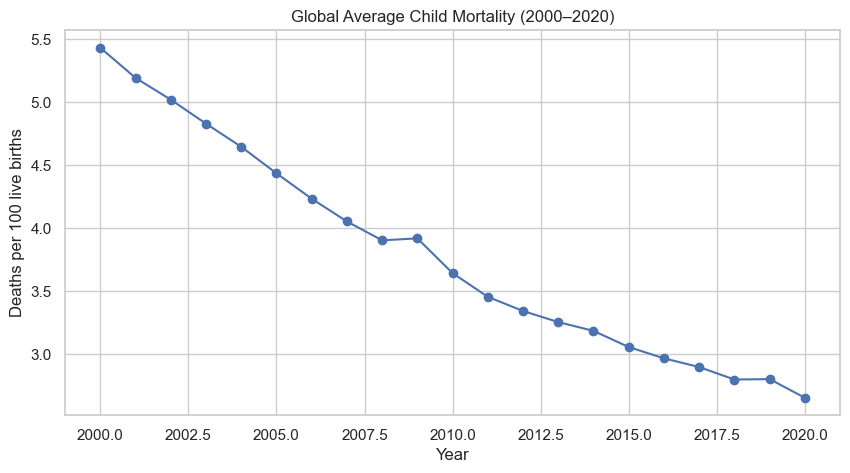

In [37]:
trend = clean_df[clean_df["Year"].between(2000, 2020)].groupby("Year")["Child_Mortality"].mean()

plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend.values, marker='o')
plt.title("Global Average Child Mortality (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Deaths per 100 live births")
plt.grid(True)
plt.show()


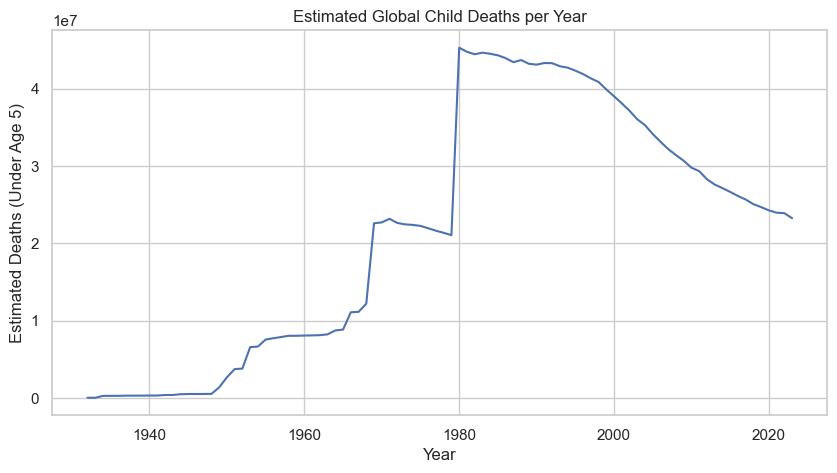

In [38]:
# Assumes 'Population (historical)' column exists from your merged dataset
merged_df = gdp.merge(cost, on=["Entity", "Code", "Year"], suffixes=('_gdp', '_cost'))
merged_df = merged_df.merge(mortality, on=["Entity", "Code", "Year"])

# Rename for clarity
merged_df = merged_df.rename(columns={
    "Child mortality rate of children aged under five years, per 100 live births": "Child_Mortality",
    "Population (historical)_gdp": "Population"
})

# Drop missing values
merged_df = merged_df.dropna(subset=["Child_Mortality", "Population"])

# Estimate births from mortality rate (inverse of rate = deaths / births * 100)
# deaths = (mortality_rate / 100) * births → if births are estimated from population
# Assume birth rate ~ 2.5% of population
merged_df["Estimated_Births"] = merged_df["Population"] * 0.025

# Estimate child deaths
merged_df["Estimated_Child_Deaths"] = merged_df["Child_Mortality"] / 100 * merged_df["Estimated_Births"]

# Group by year to get global child deaths
global_deaths_per_year = merged_df.groupby("Year")["Estimated_Child_Deaths"].sum()

# Display results
global_deaths_per_year.plot(kind="line", figsize=(10,5), title="Estimated Global Child Deaths per Year")
plt.ylabel("Estimated Deaths (Under Age 5)")
plt.grid(True)
plt.show()


In [42]:
# Ensure we use the clean merged dataset
latest_year = clean_df["Year"].max()
latest_data = clean_df[clean_df["Year"] == latest_year]

# Top 10 richest countries
top_10_richest = latest_data.sort_values(by="GDP_per_capita", ascending=False).head(10)
print("Top 10 Richest Countries in", latest_year)
print(top_10_richest[["Entity", "GDP_per_capita"]])

# Top 10 poorest countries
top_10_poorest = latest_data.sort_values(by="GDP_per_capita", ascending=True).head(10)
print("\nTop 10 Poorest Countries in", latest_year)
print(top_10_poorest[["Entity", "GDP_per_capita"]])


Top 10 Richest Countries in 2022
               Entity  GDP_per_capita
30891      Luxembourg      137059.190
25142         Ireland      124991.300
55896   United States       72841.920
13801         Denmark       70865.440
23837         Iceland       65932.130
50849          Sweden       63611.363
19970         Germany       63353.940
9334           Canada       56872.605
55635  United Kingdom       54805.445
25730           Italy       52924.610

Top 10 Poorest Countries in 2022
            Entity  GDP_per_capita
41967  Philippines        9457.104
19698      Georgia       20966.527
10439        Chile       29557.393
42490     Portugal       41288.047
42229       Poland       44160.860
16404      Estonia       44492.120
30091    Lithuania       47238.098
47773     Slovenia       47433.400
49214  South Korea       49933.977
25730        Italy       52924.610


C:\Users\greyc\AppData\Local\Temp\ipykernel_21700\123848652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_richest, x="GDP_per_capita", y="Entity", palette="viridis")


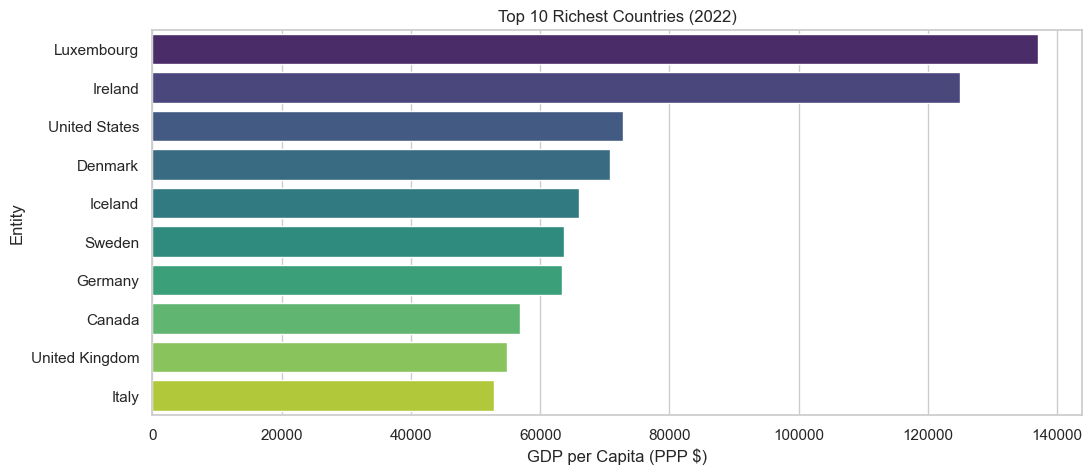

C:\Users\greyc\AppData\Local\Temp\ipykernel_21700\123848652.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_poorest, x="GDP_per_capita", y="Entity", palette="magma")


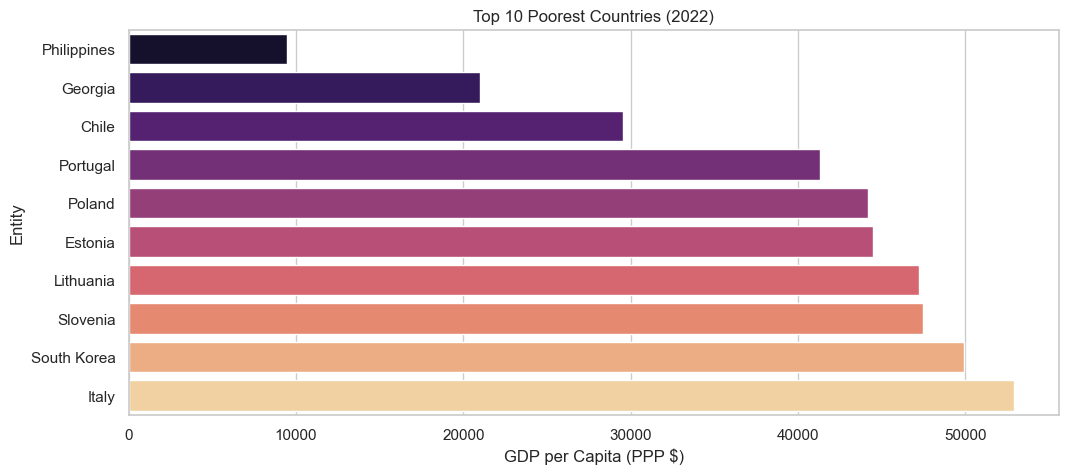

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_richest, x="GDP_per_capita", y="Entity", palette="viridis")
plt.title(f"Top 10 Richest Countries ({latest_year})")
plt.xlabel("GDP per Capita (PPP $)")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_poorest, x="GDP_per_capita", y="Entity", palette="magma")
plt.title(f"Top 10 Poorest Countries ({latest_year})")
plt.xlabel("GDP per Capita (PPP $)")
plt.show()
